<a href="https://colab.research.google.com/github/abhinag007/Stock-Money-MLM/blob/master/Stock_Predict_trading_TATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install alpha_vantage

     |████████████████████████████████| 1.2MB 6.7MB/s 
     |████████████████████████████████| 266kB 21.8MB/s 
     |████████████████████████████████| 153kB 25.8MB/s 
  Created wheel for alpha-vantage: filename=alpha_vantage-2.2.0-cp36-none-any.whl size=25705 sha256=915666992e2e40f4c28dddc07f007daa579432fbcbc2d3f24248558f9dac504f
  Stored in directory: /root/.cache/pip/wheels/3a/fa/05/80b0afcbd2a4de8bd2a0c5cd77084e3d3a9cc12c48be9b7f84
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3162 sha256=75e5beef19bc8e7efd566bfe8b48792b9d57d290b8a0bd57dd8bc37ebce9e3b2
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built alpha-vantage idna-ssl


In [ ]:
import math
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import date
from datetime import time
plt.style.use('fivethirtyeight') 

In [ ]:
# pip install alpha_vantage

In [ ]:
api_key = '5LLGMLRK81AS4OEH'

In [ ]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time
import matplotlib.pyplot as plt
from alpha_vantage.foreignexchange import ForeignExchange

In [ ]:
# ts = TimeSeries(key=api_key,output_format='pandas')
# df, meta_data = ts.get_daily(symbol='IBM', outputsize='full')
# print(df)

In [ ]:
# cc = ForeignExchange(key = api_key, output_format = 'pandas')
# df, meta_data = cc.get_currency_exchange_intraday(from_symbol='GBP', to_symbol='JPY',interval='1min',outputsize='full')
# print(df)

In [ ]:
# df = df[::-1]
# df.tail(10)

In [ ]:
# Get the stock quote
df = web.DataReader('TATAMOTORS.NS', data_source='yahoo',start = '2010-01-25', end = date.today())

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-25,154.938004,150.386993,153.988007,152.098999,8448704.0,121.989670
2010-01-27,150.862000,140.731003,148.804001,142.065994,16092885.0,113.942802
2010-01-28,145.371002,138.960007,143.460999,140.710999,27120073.0,112.856033
2010-01-29,140.848999,132.875000,139.503998,137.395996,20899408.0,110.197281
2010-02-01,143.134995,134.229996,136.080002,142.442001,24102055.0,114.244377
...,...,...,...,...,...,...
2020-08-13,131.899994,124.400002,126.099998,131.149994,95489249.0,131.149994
2020-08-14,132.649994,123.699997,131.149994,124.599998,75032834.0,124.599998
2020-08-17,126.250000,120.599998,124.500000,123.550003,61154250.0,123.550003


In [ ]:
#show the data
df['Date'] = df.index

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close,Date
Date,,,,,,,
2010-01-25,154.938004,150.386993,153.988007,152.098999,8448704.0,121.989670,2010-01-25
2010-01-27,150.862000,140.731003,148.804001,142.065994,16092885.0,113.942802,2010-01-27
2010-01-28,145.371002,138.960007,143.460999,140.710999,27120073.0,112.856033,2010-01-28
2010-01-29,140.848999,132.875000,139.503998,137.395996,20899408.0,110.197281,2010-01-29
2010-02-01,143.134995,134.229996,136.080002,142.442001,24102055.0,114.244377,2010-02-01
...,...,...,...,...,...,...,...
2020-08-13,131.899994,124.400002,126.099998,131.149994,95489249.0,131.149994,2020-08-13
2020-08-14,132.649994,123.699997,131.149994,124.599998,75032834.0,124.599998,2020-08-14
2020-08-17,126.250000,120.599998,124.500000,123.550003,61154250.0,123.550003,2020-08-17


In [ ]:
#Get number of rows and colomns in datasets
df.shape

(2604, 7)

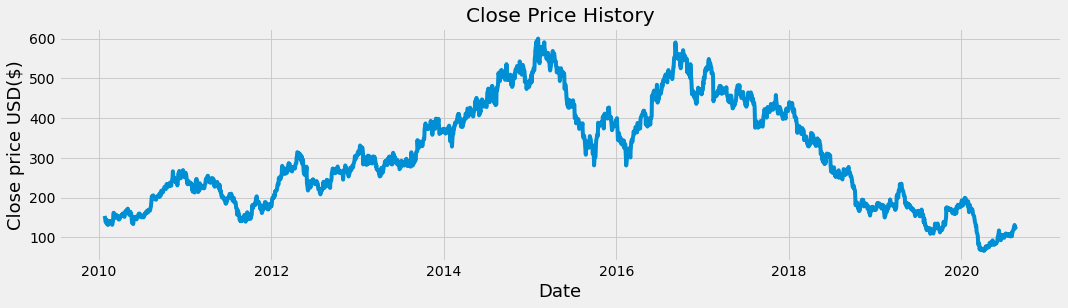

In [ ]:
# Close price history
plt.figure(figsize=(16,4))
plt.title('Close Price History')
plt.plot(df['Open'],);
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD($)', fontsize = 18)
plt.show()

In [ ]:
# Create new dataframe with only close coloumn
data = df.filter(['Open'])
# Convert dataframe to numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * 0.99)

training_data_len

2578

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.16392363],
       [0.15421052],
       [0.1441995 ],
       ...,
       [0.10867285],
       [0.10773601],
       [0.11335702]])

In [ ]:
# Create training datasets
# Create the scaled training datasets
train_data = scaled_data[0:training_data_len,:]
# Slit x_train and y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print() 

[array([0.16392363, 0.15421052, 0.1441995 , 0.13678538, 0.13036995,
       0.14605444, 0.1404915 , 0.14271742, 0.12380836, 0.12568014,
       0.1220471 , 0.12936941, 0.12566141, 0.13266895, 0.13014886,
       0.13863844, 0.14030789, 0.1364144 , 0.13863844, 0.13455946,
       0.13196444, 0.13048236, 0.1219553 , 0.14234644, 0.17571464,
       0.17530617, 0.17868064, 0.17200664, 0.16644558, 0.16385056,
       0.16459064, 0.16199561, 0.15532347, 0.16199561, 0.16822556,
       0.16559306, 0.16292307, 0.16347958, 0.15717652, 0.1516155 ,
       0.14660903, 0.15461898, 0.15157802, 0.15643456, 0.15717652,
       0.16575982, 0.1664081 , 0.16271885, 0.17052456, 0.16644558,
       0.17569588, 0.16570361, 0.16459064, 0.16273758, 0.15949425,
       0.16347958, 0.16985567, 0.17456421, 0.18609475, 0.18943177])]
[0.1902842948527716]



In [ ]:
# convert x_train y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(2518, 60, 1)

In [ ]:
# Build LSTM Model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(15))
model.add(Dense(1))


In [ ]:
model.compile(optimizer='adam',loss='mse')


In [ ]:
model.fit(x_train,y_train,batch_size=1, epochs = 1,)

2518/2518 [==============================] - 53s 21ms/step - loss: 0.0018


In [ ]:
# Crete testing datasets
# Create a new array containing scaled value from index 1704 to 2130
test_data = scaled_data[training_data_len-60: ,:]
# Create dataset x_test, y_test 
x_test = []
y_test = dataset[training_data_len: ,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
# x_test = range(10)

In [ ]:
# Get model prediction price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

8.42355962900015

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


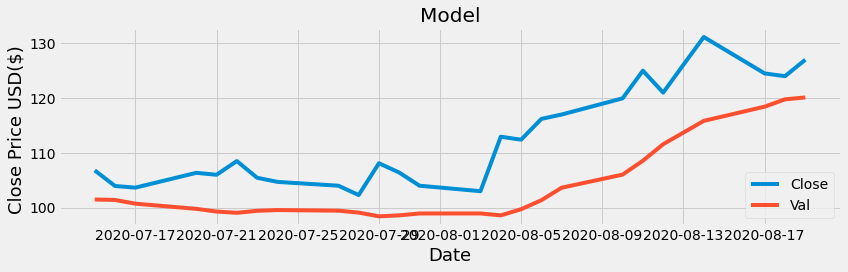

In [ ]:
# PLot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(12,4))
plt.title("Model")
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($) ', fontsize=18)
# plt.plot(train['Open'])
plt.plot(valid[['Open', 'Predictions']])
plt.legend(['Close','Val','Predictions'],loc = 'lower right')
plt.tight_layout()
plt.show()

In [ ]:
valid.sum(axis=0)

Open           2930.449982
Predictions    2711.437431
dtype: float64

In [ ]:
valid

,Open,Predictions
Date,,
2020-07-15,106.800003,101.487213
2020-07-16,103.949997,101.402176
2020-07-17,103.650002,100.721672
2020-07-20,106.349998,99.779640
2020-07-21,106.000000,99.283096
2020-07-22,108.500000,99.056404
2020-07-23,105.449997,99.419380
2020-07-24,104.699997,99.560280
2020-07-27,104.000000,99.442368


In [ ]:
# # Get the quote
# # apple_quote = web.DataReader('TATAMOTORS.NS',data_source='yahoo',start='2012-01-01',end='2020-06-22')
# apple_quote, meta_data = cc.get_currency_exchange_intraday(from_symbol='GBP', to_symbol='JPY',interval='1min',outputsize='full')
# apple_quote = apple_quote[::-1]
# # Create new dataframe
# new_df = apple_quote.filter(items=['Open'])
# # Get the last 60 days closing price and convert to numpy array
# last_60_days = new_df[-60:].values
# # Scale the data to be values between 0 and 1
# last_60_days_scaled = scaler.transform(last_60_days)
# # Create an empty list
# X_test = []
# # Append the past 60 days
# X_test.append(last_60_days_scaled)

# # Convert the X_test dataset to numpy array
# X_test = np.array(X_test)
# # Reshape the data
# X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# # Get Predicted scaled price
# pred_price = model.predict(X_test)
# # undo the scaling
# pred_price = scaler.inverse_transform(pred_price)
# comp = (new_df['Open'][-1])
# # comp = float("{:.5f}".format(comp))
# # pred_price = float(pred_price)
# # pred_price = float("{:.4f}".format(pred_price))
# print(pred_price)
# print(comp)
# if pred_price > comp:
#   print("green")
# elif pred_price < comp:
#   print("red")
# else:
#   print ("Dont buy or sell")

In [ ]:
# new, meta_data = cc.get_currency_exchange_intraday(from_symbol='GBP', to_symbol='JPY',interval='1min',outputsize='full')
# new = new[::-1]
# print(new.tail(10))

In [ ]:
# pred_price = np.reshape(pred_price,1)
# lst_2 = np.reshape(lst_2,60)
# lst_2 = np.append(lst_2,pred_price)
# lst_2 = lst_2[1:]
# lst_2=np.reshape(lst_2,(1,60,1))
# pred_price = model.predict(lst_2)
# pred_price = scaler.inverse_transform(pred_price)
# print(pred_price)
# pred_price = scaler.transform(pred_price)